In [2]:
from platform import python_version

print(python_version())

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

from mendeleev import element

#import chemcoord as cc

from rdkit import Chem
import seaborn as sns
import pandas as pd
import numpy as np
import shutil
import glob
import csv
import ast
import os
import re
from astroquery.linelists.cdms import CDMS
import astropy.units as u
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#import rmsd

#sns.set_context('poster', font_scale=1.1)
#pd.set_option('display.max_rows', None)  

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

3.10.6


In [16]:
## DataFile  ##
data_all = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1.csv')
data_all

,Formula,SMILES,# Atoms,Conf#,Rotamer Degeneracy,Relative Energy [kJ/mol],RawFreq [cm-1],ScaledFreq [cm-1],Intensity,mu_a [D],mu_b [D],mu_c [D],mu_tot [D],mu_amu_bmu_c,A [cm-1],B [cm-1],C [cm-1]
0,C2H2,C#C,4,CONF1,1,0.000000,"[639.7313, 639.7313, 759.3909, 759.3909, 2058....","[636.7858900913433, 636.7858900913433, 755.894...","[0.0, 0.0, 99.8956, 99.8956, 0.0, 93.1466, 0.0]",2.967677e-11,0.000001,-0.000005,0.000005,-1.666957e-22,0.000000,1.184735,1.184735
1,C2H2O2,O=CC=O,6,CONF1,1,0.000000,"[124.82, 335.7128, 548.3595, 806.0992, 1059.24...","[124.24531174447999, 334.16713261185924, 545.8...","[33.6996, 50.3668, 0.0, 2.111, 0.0, 0.0, 8.127...",1.800275e-06,-0.000001,0.000007,0.000007,-1.446818e-17,1.861842,0.159363,0.146798
2,C2H2OS_1,C#CSO,6,CONF1,1,0.000000,"[172.0997, 310.9645, 424.0011, 447.7487, 505.7...","[171.3073295756408, 309.532777150828, 422.0489...","[1.9386, 38.806, 53.7728, 20.2899, 68.4295, 9....",-5.466939e-01,0.581126,-1.353319,1.571004,4.299470e-01,0.672851,0.131892,0.111405
3,C2H2OS_2,O=CC=S,6,CONF1,1,0.000000,"[104.8753, 289.6209, 486.7035, 801.0723, 1025....","[104.39243985575919, 288.2874459879576, 484.46...","[16.4434, 17.5575, 5.9577, 18.578, 2.8034, 48....",-1.118855e+00,0.088795,0.000095,1.122373,-9.414538e-06,1.725695,0.095213,0.090234
4,C2H2O_1,C1=CO1,5,CONF1,1,0.000000,"[169.4469, 285.809, 787.6722, 830.3644, 980.58...","[168.6667434276216, 284.49309649397605, 784.04...","[0.4926, 81.8028, 16.8026, 33.8337, 70.4639, 1...",-2.330776e+00,-0.060112,-0.000187,2.331551,-2.615070e-05,1.221050,0.800449,0.483497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,C6H8_6,CC1=CC1C=C,14,CONF2,3,3.827976,"[56.6391, 150.5279, 167.9715, 250.3577, 310.90...","[56.378325880682404, 149.8348490766056, 167.19...","[0.343, 0.0441, 3.148, 1.9534, 8.3146, 7.2842,...",-1.169567e+00,0.386492,-0.092404,1.235233,4.176908e-02,0.219722,0.082840,0.074881
10200,C6H8_6,CC1=CC1C=C,14,CONF1,3,0.000000,"[96.7927, 143.5282, 178.4043, 280.3312, 327.32...","[96.3470532453928, 142.8673766473648, 177.5829...","[0.4077, 0.0324, 2.6933, 1.6031, 5.9492, 9.959...",-1.438603e+00,0.207033,-0.133619,1.459553,3.979669e-02,0.276880,0.070069,0.060904
10201,C6H8_8,CC1=CC=CC1,14,CONF1,3,0.000000,"[146.662, 228.0479, 320.4314, 366.9551, 523.97...","[145.986748205968, 226.99793645388561, 318.956...","[0.0746, 0.441, 0.7913, 13.283, 0.273, 0.3618,...",-5.666862e-01,-0.476127,0.000000,0.740155,0.000000e+00,0.268572,0.107810,0.079179
10202,C6H8_8,CC1=CC=CC1,14,CONF2,2,5.755353,"[147.7289, 228.2627, 320.6789, 366.7922, 523.9...","[147.0487360532696, 227.2117474854728, 319.202...","[0.0801, 0.4321, 0.7899, 13.2812, 0.2709, 0.36...",-5.672021e-01,-0.470850,-0.065963,0.740114,-1.761649e-02,0.268571,0.107810,0.079179


# Plot: Number of Conformers per Number of Rotablebonds

In [10]:
# rota bonds
SMILES = data_all['SMILES'].values
rota_bond_list = []
df_rota_smile = pd.DataFrame(columns = ['SMILES','# Rotatable Bonds'])
for smile in SMILES:
    mol = Chem.MolFromSmiles(smile)
    molh = Chem.AddHs(mol)
    rota_bond = Chem.rdMolDescriptors.CalcNumRotatableBonds(molh,strict = Chem.rdMolDescriptors.NumRotatableBondsOptions.StrictLinkages)
    rota_bond_list.append(rota_bond)
    df_rota_smile.loc[len(df_rota_smile)] = list([smile,rota_bond])
    print(rota_bond,smile)
    

1 C#C
3 O=CC=O
3 C#CSO
3 O=CC=S
2 C1=CO1
2 C=C=O
2 C1C(=S)S1
3 S=CC=S
2 C1=CS1
2 C=C=S
3 C1=CN1
3 N#CC
3 C[N+]#[C-]
4 C=C
1 [N-]=[N+]=CC#N
1 C(=O)C#N
2 SC(C#N)=S
1 O=PC#C
0 N#CC#N
0 N#CN=C=O
0 N#CN=C=S
0 C(=C=S)=S
2 C1=CC1=O
2 C=C=C=O
2 O=CC#C
0 C#CC#N
1 N#CC=C=O
0 O=C(C#N)C#N
0 C(=C=S)=C=S
1 C#CC#C
0 C(=C=C=S)=C=S
2 N#CN
3 N#CNO
3 N#CNO
3 N=C(N=O)
3 N#CSN
3 N#CSN
2 C=O
3 O=CO
4 C(=O)OO
2 C=S=O
2 C=S
4 O=CN
4 S=CN
4 O=PC
4 C
5 OC
5 SC
0 C#N
2 [N-]=[N+]=NC=O
2 [N-]=[N+]=NC=O
2 N#CS(O)=O
2 N#CS(O)=O
2 [O-][N+](=O)C=O
3 OC(=O)N=O
3 OC(=O)N=O
3 OC(=O)N=O
1 OC#N
1 N=C=O
1 SC#N
2 C(=O)(N=O)N=O
1 N#CSN=O
1 N#CSN=O
0 N#CN=O
0 [C-]#[O+]
0 O=C=O
0 O=C=S
0 S=C=S
3 N[N+](=O)[O-]
2 O
3 OO
5 OSSO
5 OSSO
5 OSSO
4 O=S(O)O
4 O=S(O)O
2 S
3 N
4 NO
4 O=[PH2]O
4 O=[PH2]O
3 [H][P]([H])([H])=O
3 P
5 NN
5 NP
1 N=[N+]=[N-]
1 N=O
2 [O-][N+](=O)S
2 O[N+]([O-])=O
2 O=PO
1 P=O
0 N#N
0 O=O
0 O=S=O
0 O=[O+][O-]
0 O=S(=O)=O
0 P12P3P1P23
4 NC1=NOC=N1
4 NC1=NON=C1
4 NC1=NN=CO1
4 OC1=CN=NN1
4 OC1=CN=NN1
4 OC1=NC=NN1
4 N

17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NCC(C)NC
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(CC)C
17 NNC(C)(C)C
17 NNC(C)(C)C
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CCNNCC
17 CN(NC)CC
17 CN(NC)CC
17 CN(NC)CC
17 CN(NC)CC
17 CN(NC)CC
17 CN(NC)CC
17 CN(NC)CC
17 CN(N)C(C)C
17 CN(N)C(C)C
17 CN(N)C(C)C
17 CN(N)C(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CNNC(C)C
17 CN(N)CCC
17 CN(N)CCC
17 CN(N)CCC
17 CN(N)CCC
17 CN(N)CCC
17 CN(N)CCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC
17 CNNCCC


11 O=S(CCN)O
11 O=S(CCN)O
11 O=S(O)N(C)C
10 O=S(N)(CC)=O
10 O=S(N)(CC)=O
10 O=S(N)(CC)=O
10 O=S(N)(CC)=O
10 O=S(NC)(C)=O
10 O=S(NC)(C)=O
11 S=P(O)(O)CC
11 S=P(O)(O)CC
11 S=P(OC)OC
11 S=P(OC)OC
11 S=P(OC)OC
11 S=P(O)(OC)C
11 S=P(O)(OC)C
11 O=P(O)(CO)C
11 O=P(O)(CO)C
11 O=P(O)(CO)C
11 O=P(OC)OC
11 O=P(OC)OC
11 O=P(OC)OC
11 O(P(=O)O)CC
11 O(P(=O)O)CC
11 O=P(O)(CC)O
11 O=P(O)(CC)O
11 O=P(OC)(C)O
11 O=P(OC)(C)O
11 S=P(OC)(S)C
11 S=P(OC)(S)C
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 ONCNC
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 CC(O)NN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 NOCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 ONCCN
12 NNCCO
12 NNCCO
12 NNCCO
12 NNCCO
12 NNCCO
12 NNCCO
12 NNCCO
12 NNCC

11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OCCC=C
11 OC(C=C)C
11 OC(C=C)C
11 OC(C=C)C
11 OC(C=C)C
11 OC(C=C)C
11 CC(CC)=O
11 CC(CC)=O
11 CC(CC)=O
11 O=CCCC
11 O=CCCC
11 O=CCCC
11 O=CCCC
9 OC1CCC1
9 OC1CCC1
10 OCC1CC1
10 OCC1CC1
10 OCC1CC1
10 OCC1CC1
10 OCC1CC1
11 CCOC=C
11 CCOC=C
11 O=CC(C)C
10 OC1(CC1)C
10 OC1(CC1)C
10 COC1CC1
8 C(C1)OC(C1)
10 CC1(C)CO1
10 CCC1CO1
10 CCC1CO1
11 COC(C)=C
9 CC1OCC1
11 C=C(C)CO
11 C=C(C)CO
11 C=C(C)CO
11 C=C(C)CO
11 COCC=C
11 COCC=C
11 COCC=C
11 COCC=C
11 COCC=C
10 SC1(CC1)C
10 SC1(CC1)C
11 SC/C=C/C
11 SC/C=C/C
11 SC/C=C/C
11 SC/C=C/C
11 S\C(=C/C)C
11 S\C(=C/C)C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SCCC=C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 SC(C=C)C
11 S=C(C)CC
11 S=C(C)CC
11 S=C(C)CC
11 S=C(C)CC
9 SC1CCC1
10 CSC1CC1
10 SCC1CC1
10 SCC1CC1
10 SCC1CC1
10 SCC1CC1
11 CCSC=C
11 CCSC=C
11 CCSC=C
11 CCSC=C
11 CSC=CC
11 CSC=CC


6 C=C(C=C)C#N
5 C1(N2)=C2C=CC1
5 N#CC12CC2C1
6 CCC#CC#N
6 CC#CCC#N
5 C#CP1C=CC1
6 CP(C#C)C#C
6 C#CPCC#C
6 C#CPCC#C
6 C#CPCC#C
6 C#CC(P)C#C
6 C#CC(P)C#C
7 C=CC1=CC1
7 C=CC1=CC1
7 CC#CC=C
7 C=CCC#C
7 CC=CC#C
7 C=CC=C=C
7 C=CC=C=C
6 C1=CC12CC2
6 C=C=C1CC1
7 C=C(C#C)C
6 C=C1CC=C1
7 C=CC1C=C1
6 C1(C2)=C2CC1
6 C/1C2C\C=C\12
6 C1C=CC=C1
6 C#CC1CC1
9 ON=C(N)NO
9 NC(=O)NNO
9 NC(=O)NNO
9 NC(=O)NNO
9 NC(=O)NNO
9 NNC(NO)=O
6 N\1=N\NNC/1N
6 N\1=N\NNC/1N
6 N\1=N\NNC/1N
8 O=S(=O)(SN)C
8 O=S(=O)(SN)C
8 O=S(O)(CN)=O
8 O=S(O)(CN)=O
8 COS(=O)(=O)N
8 COS(=O)(=O)N
8 COS(=O)(=O)N
8 COS(=O)(=O)N
8 O=S(NC)(O)=O
8 O=S(NC)(O)=O
8 O=S(NC)(O)=O
8 O=S(NC)(O)=O
8 O=S(NO)(C)=O
8 O=S(NO)(C)=O
8 O=S(NO)(C)=O
8 O=S(=O)(ON)C
8 O=S(=O)(ON)C
8 O=S(=O)(ON)C
9 O=P(O)(O)CS
9 O=P(O)(O)CS
9 O=P(O)(O)CS
9 O=P(O)(O)CS
9 O=P(O)(O)CS
9 S=P(O)(O)OC
9 S=P(O)(O)OC
9 S=P(O)(O)OC
9 O=P(O)(CO)O
9 O=P(O)(CO)O
9 O=P(O)(CO)O
9 O=P(O)(CO)O
9 O=P(O)(O)OC
9 O=P(O)(O)OC
9 O=P(O)(O)OC
9 O=P(O)(O)OC
9 S=P(OC)(S)S
9 S=P(OC)(S)S
9 S=P(OC)(S)S
9 S=

11 NCC1OCC1
11 NCC1OCC1
11 NCC1OCC1
11 NCC1OCC1
11 NCC1COC1
11 NCC1COC1
11 NCC1COC1
11 NCC1COC1
11 NCC1COC1
10 ON1CCCC1
10 ON1CCCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
10 [H][C@@]1(O)CNCC1
9 N1CCCCO1
9 N1CCCCO1
10 NC1CCCO1
10 NC1CCCO1
10 NC1CCCO1
10 NC1CCCO1
10 NC1CCCO1
10 N[C@]1(COCC1)[H]
10 N[C@]1(COCC1)[H]
10 N[C@]1(COCC1)[H]
10 N[C@]1(COCC1)[H]
10 N[C@]1(COCC1)[H]
10 N[C@]1(COCC1)[H]
9 O1CNCCC1
10 CN1COCC1
10 CN1COCC1
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 OC/C=C/CN
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O
13 NCC(C=C)O


16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 NOCCCC
16 CN(OCC)C
16 CN(OCC)C
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 CCCNOC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NCOCCC
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 NC(OCC)C
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNCOCC
16 CNC(OC)C
16 CNC(OC)C
16 CNC(OC)C
16 CNC(OC)C
16 CNC(OC)C
16 CNC(OC)C
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(OC)CC
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 NC(COC)C
16 OCCN(C)C
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16 NC(C)CSC
16

4 O=S1OCCS1
4 O=S1OCCS1
4 O=S1(=O)CSC1
4 O=S1CS(=O)C1
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
8 OC(=O)CSS
4 O=S1OCCO1
7 O=C(S(=O)O)C
7 O=C(S(=O)O)C
7 O=C(S(=O)O)C
7 O=CCS(=O)O
7 O=CCS(=O)O
7 O=CCS(=O)O
7 O=CCS(=O)O
6 C=CS(=O)(=O)O
6 C=CS(=O)(=O)O
7 O=S(OC=C)O
7 O=S(OC=C)O
7 O=S(OC=C)O
7 O=S(OC=C)O
7 O=S(OC=C)O
7 O=S(OC=C)O
4 C1SCS(=O)S1
4 C1SCS(=O)S1
4 C1SCS(=O)S1
4 S1SSSCC1
4 S1SSCSC1
4 S1SCSSC1
4 S1SCSSC1
8 S/C(S)=C(/S)S
8 S/C(S)=C(/S)S
8 S/C(S)=C(/S)S
8 S/C(S)=C(/S)S
8 S/C(S)=C(/S)S
5 C1CPN=N1
7 CN=C=NN
7 CN=C=NN
7 N#CN(N)C
7 N#CN(N)C
7 N#CN(N)C
5 N\1=C\NNC/1
5 N\1=C\NNC/1
5 C1CN=NN1
7 [N-]=[N+]=NCC
7 [N-]=[N+]=NCC
7 N#CNCN
7 N#CNCN
7 N#CNCN
7 N(\N=C\N)=C
7 N(\N=C\N)=C
8 NC(CO)=O
8 NC(CO)=O
8 NC(CO)=O
8 NCC(O)=O
8 NCC(O)=O
8 NC(OC)=O
8 NC(OC)=O
8 ONC(C)=O
7 CC[N+]([O-])=O
8 CONC=O
8 S=C(CO)N
8 S=C(CO)N
8 S=C(CO)N
8 SCC(N)=O
8 S=CN(O)C
8 S=CN(O)C
5 N1CCSS1
5 S1SCNC1
8 CSC(=S)N
8 OC(=O)CP
8 OC(=O)CP
7 O=P(C=C)O
7 O=P(C=C)O
7 O=P(

9 N#CCCON
9 N#CCCON
9 N#CCCON
9 N#CCCON
9 N\C=C\C(N)=O
9 NC(NC=C)=S
9 NC(NC=C)=S
9 NC(NC=C)=S
8 NC(N1CC1)=S
6 S=C1NCCN1
6 N=C1SCCN1
7 NC1=NCCS1
8 CC#CP(=O)([H])N
8 CC#CP(=O)([H])N
8 O=S(C)(C=C)=O
10 O=C(O)CSC
10 O=C(O)CSC
10 O=C(O)CSC
10 O=C(O)CSC
10 O=C(O)CSC
10 SC(C)C(O)=O
10 SC(C)C(O)=O
10 SC(C)C(O)=O
10 SC(C)C(O)=O
10 SC(C=O)CO
10 SC(C=O)CO
10 SC(C=O)CO
10 SC(C=O)CO
10 SC(C=O)CO
10 SC(C=O)CO
10 O=C(O)CCS
10 O=C(O)CCS
10 O=C(O)CCS
10 O=C(O)CCS
10 O=C(O)CCS
10 O=C(O)CCS
10 SCC(OC)=O
10 SCC(OC)=O
10 SCC(OC)=O
10 SCC(OC)=O
10 SCC(OC)=O
6 O=S1(CCC1)=O
6 O=S1OCCC1
6 O1COCOC1
10 OCC(CO)=O
10 OCC(CO)=O
10 O[C@](CO)(C=O)[H]
10 O[C@](CO)(C=O)[H]
10 O[C@](CO)(C=O)[H]
10 O[C@](CO)(C=O)[H]
10 O[C@](CO)(C=O)[H]
10 O[C@](CO)(C=O)[H]
10 OC(C)C(O)=O
10 OC(C)C(O)=O
10 O=C(O)COC
10 O=C(O)COC
10 O=C(O)COC
10 O=C(O)COC
10 OCCC(O)=O
10 OCCC(O)=O
10 OCCC(O)=O
10 OCCC(O)=O
10 OCCC(O)=O
10 O=C(OC)OC
10 OCC(OC)=O
7 OC1CSSC1
10 S=C(SC)OC
10 S=C(SC)OC
10 CSC(SC)=O
6 S1SSCCC1
6 S1SCSCC1
6 S1CSCSC1
10 CSC(SC)=S

13 NCCN1CC1
13 NCCN1CC1
13 NCCN1CC1
13 NCCN1CC1
13 NCCN1CC1
14 NC(N)=C(C)C
14 NC(N)=C(C)C
12 NC1(C)CNC1
12 NC1(C)CNC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1NCC1
12 NCC1CNC1
12 NCC1CNC1
12 NCC1CNC1
12 NCC1CNC1
12 NCC1CNC1
14 NC(N)=CCC
14 NC(N)=CCC
14 NC(N)=CCC
14 NC(N)=CCC
14 NC(N)=CCC
14 NC(N)=CCC
14 NC(N)=CCC
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNCCC=C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
14 NNC(C=C)C
12 NC1CC(N)C1
12 NC1CC(N)C1
12 NC1CC(N)C1
12 NNC1CCC1
12 NNC1CCC1
12 NNC1CCC1
12 NNC1CCC1
12 NNC1CCC1
12 NNC1CCC1
14 NNCC

15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 SCCCCS
15 NCC(C)C
15 NCC(C)C
15 NCC(C)C
15 NCC(C)C
15 NCC(C)C
15 NC(C)(C)C
15 NC(C)(C)C
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NCCCC
15 NC(CC)C
15 NC(CC)C
15 NC(CC)C
15 NC(CC)C
15 NC(CC)C
15 NC(CC)C
15 NC(CC)C
15 CCNCC
15 CCNCC
15 CCNCC
15 CCNCC
15 CN(CC)C
15 CN(CC)C
15 CNCCC
15 CNCCC
15 CNCCC
15 CNCCC
15 CNCCC
15 CNCCC
15 CNCCC
15 CNC(C)C
15 CNC(C)C
15 CNC(C)C
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCCCP
15 CCPCC
15 CCPCC
15 CCPCC
15 CCPCC
15 CCPCC
15 CP(CC)C
15 CP(CC)C
15 CC(CP)C
15 CC(CP)C
15 CC(CP)C
15 CC(CP)C
15 CC(CP)C
15 CPC(C)C
15 CPC(C)C
15 CPC(C)C
15 CPCCC
15 CPCCC
15 CPCCC
15 CPCCC
15 CPCCC
15 CPCCC
15 CPCCC
15 CC(P)CC
15 CC(P)CC
15 CC(P)CC
15 CC(P)CC
15 CC(P)CC
15 CC(P)CC
15 CC(P)CC
15 CC(C)(P)C
15 CC(C)(P)C
13 OCC1(CC1)C
13 OCC1(CC1)C
13 OCC1(CC1)C
13 OCC1(CC1)C
13 OCC1(CC1

12 CC(N)P(=O)O
12 CC(N)P(=O)O
12 CC(N)P(=O)O
12 O=P(CCN)O
12 O=P(CCN)O
12 CP(=O)(CN)O
12 CP(=O)(CN)O
12 CP(=O)(CN)O
12 CP(=O)(CN)O
12 CP(=O)(CN)O
12 CP(=O)(CN)O
13 NP(OC)OC
13 NP(OC)OC
13 NP(OC)OC
13 NP(OC)OC
12 O=P(SC)(N)C
12 O=P(SC)(N)C
12 O=P(SC)(N)C
12 O=P(SC)(N)C
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
13 NCCNN
12 ONC(N)=CC
12 ONC(N)=CC
12 ONC(N)=CC
12 ONC(N)=CC
12 NC(N)=COC
12 NC(N)=COC
12 NC(N)=COC
12 NC(N)=COC
12 NC(N)=CCO
12 NC(N)=CCO
12 NC(N)=CCO
12 NC(N)=CCO
12 NC(N)=CCO
12 NCCC(N)=O
12 NCCC(N)=O
12 NCCC(N)=O
12 NCCC(N)=O
12 NCCC(N)=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
11 NCCNC=O
12 O=CNN(C)C
12 O=CNN(C)C
10 NNC1COC1
10 NNC1COC1
10 NNC1COC1
10 NNC1COC1
10 NNC1COC1
10 NNC1COC1
12 NNC(CC)=O
12 NNC(CC)=O
12 NNC(CC)=O
9 OC1CNNC1
9 OC1CNNC

8 O1SCCCC1
11 C=CCS(C)=O
11 C=CCS(C)=O
11 C=CCS(C)=O
11 C=CCS(C)=O
11 C=CCS(C)=O
11 C=CCS(C)=O
8 C1COCSC1
12 CCCSC=O
12 CCCSC=O
12 CCCSC=O
12 CCCSC=O
8 O1CCSCC1
11 CSCC1OC1
11 CSCC1OC1
11 CSCC1OC1
11 CSCC1OC1
11 CSCC1OC1
11 CSCC1OC1
11 CSCC1OC1
12 CCSCC=O
12 CCSCC=O
12 CCSCC=O
12 CCSCC=O
12 CCSCC=O
12 CCSCC=O
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
12 OCCSC=C
10 CSC1COC1
10 CSC1COC1
10 CSC1COC1
10 CSC1COC1
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 O=CCCSC
12 SC(C(C)=O)C
12 SC(C(C)=O)C
12 SC(C(C)=O)C
12 SC(C(C)=O)C
12 SC(C(C)=O)C
12 SC(C(C)=O)C
12 SC(C(C)=O)C
8 C(C1)SSC(C1)
12 CCSC(C)=S
12 CCSC(C)=S
12 CCC(SC)=S
12 CCC(SC)=S
12 CSC=CSC
12 CSC=CSC
12 CSC=CSC
8 S1CSCCC1
12 CSSC(C=C)
12 CSSC(C=C)
12 CSSC(C=C)
12 CSSC(C=C)
12 CSSC(C=C)
12 CSSC(C=C)
11 CSSC(C1)(C1)
11 CSSC(C1)(C1)
11 CSSC(C1)(C1)
12 C=CSSCC
12 C=CSSCC
12 C=CSSCC
12 C=CSSCC
12 C=CSSCC
12 C=CSSCC
12

19
[  21   21   71   90  222  252  337  444  509  666  863  972 1089  983
  946 1249  580  565  306   18]


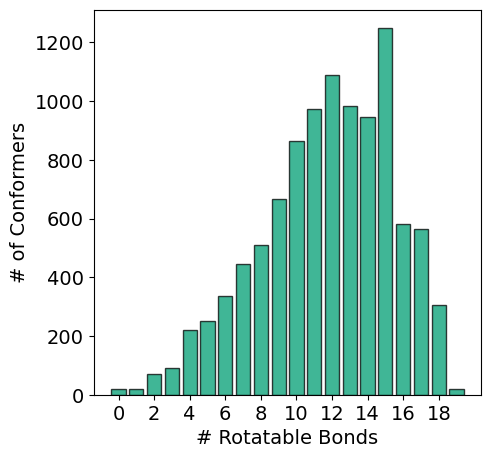

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5,5),sharey= False)

labels, counts = np.unique(rota_bond_list, return_counts=True)
print(np.max(rota_bond_list))
print(counts)
ax.bar(labels, counts, align='center',facecolor='#009E73', edgecolor='black', alpha=0.75)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('# Rotatable Bonds',fontsize=14)
ax.set_ylabel('# of Conformers',fontsize=14)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18])

plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/Confs_RotaBonds_histogram.pdf',bbox_inches='tight')
plt.show()

# Plot: Histogram of Relative energies of conformers

11.696592057356613
[ 0.          0.5848296   1.16965921  1.75448881  2.33931841  2.92414801
  3.50897762  4.09380722  4.67863682  5.26346643  5.84829603  6.43312563
  7.01795523  7.60278484  8.18761444  8.77244404  9.35727365  9.94210325
 10.52693285 11.11176245 11.69659206]
[3202.  458.  456.  513.  470.  573.  523.  561.  562.  477.  487.  447.
  378.  335.  279.  195.  137.  100.   33.   18.] 7002.0 0.3137985103880831


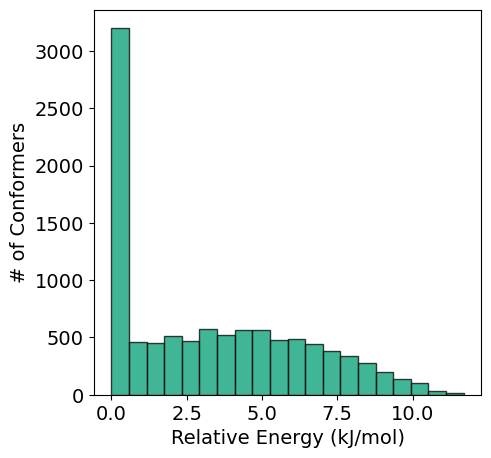

In [26]:
fig, ax = plt.subplots(1,1,figsize=(5,5),sharey= False)
relative_energy = data_all['Relative Energy [kJ/mol]'].values
print(np.max(relative_energy))
n, bins, patches = plt.hist(relative_energy, 20, density=False, facecolor='#009E73',edgecolor='black', alpha=0.75)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
print(bins)
print(n,sum(n[1:]),n[0]/np.sum(n))
ax.set_xlabel('Relative Energy (kJ/mol)',fontsize=14)
ax.set_ylabel('# of Conformers',fontsize=14)
plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/Confs_RelativeEnergies_Histogram.pdf',bbox_inches='tight')
plt.show()

In [27]:
288/10204

0.02822422579380635

## Plot: Average abundance of low energy conformers per molecule per # atoms

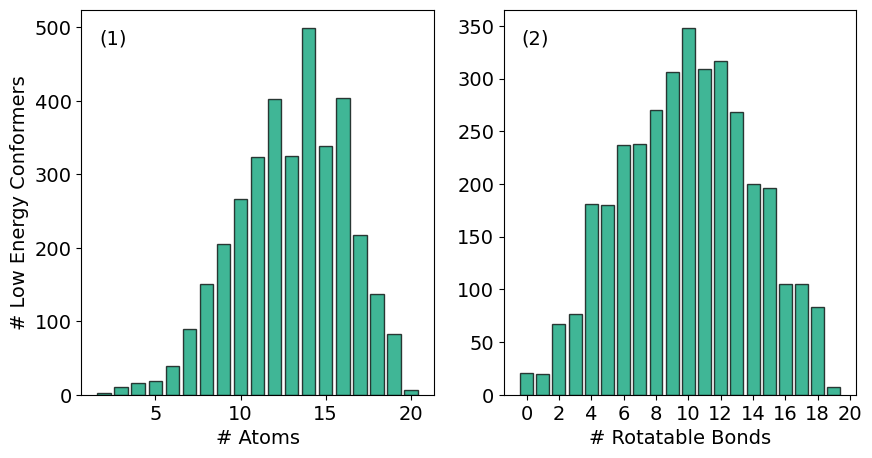

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey= False)


# per # atoms
SMILES = np.unique(data_all['SMILES'].values)
eng_abundance_list = []
tot_atoms_list = []
for smile in SMILES:
    tot_atoms_list = tot_atoms_list+list(data_all.loc[(data_all['SMILES'] == smile) & (data_all['Relative Energy [kJ/mol]'] < 1)]['# Atoms'].values)

            
labels, counts = np.unique(tot_atoms_list, return_counts=True)
ax[0].bar(labels, counts, align='center',facecolor='#009E73', edgecolor='black', alpha=0.75)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)

ax[0].set_xlabel('# Atoms',fontsize=14)
ax[0].set_ylabel('# Low Energy Conformers',fontsize=14)
ax[0].text(0.05, 0.95, '(1)', transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top')


# per number rotatable bonds

SMILES = np.unique(data_all['SMILES'].values)
eng_abundance_list = []
tot_rotatablebonds_list = []
for smile in SMILES:
    num = len(data_all.loc[(data_all['SMILES'] == smile) & (data_all['Relative Energy [kJ/mol]'] < 1)])
    
    mol = Chem.MolFromSmiles(smile)
    molh = Chem.AddHs(mol)
    rota_bond = Chem.rdMolDescriptors.CalcNumRotatableBonds(molh,strict = Chem.rdMolDescriptors.NumRotatableBondsOptions.StrictLinkages)
    
    tot_rotatablebonds_list += [rota_bond]*num


            
labels, counts = np.unique(tot_rotatablebonds_list, return_counts=True)
ax[1].bar(labels, counts, align='center',facecolor='#009E73', edgecolor='black', alpha=0.75)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)

ax[1].set_xlabel('# Rotatable Bonds',fontsize=14)
ax[1].set_xticks([0,2,4,6,8,10,12,14,16,18,20])
ax[1].text(0.05, 0.95, '(2)', transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top')


plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/ConfsRotas_RotaBonds_LowEng_Histograms.pdf',bbox_inches='tight')
plt.show()
    
    

# Plot: Two Lowest Energy Conformers Histos

/var/folders/gd/w_6sx_r160zb391203k006_h0000gq/T/ipykernel_59161/4125657371.py:26: RuntimeWarning: Mean of empty slice
  avg_eng_diff_list.append(np.nanmean(eng_diff_list))


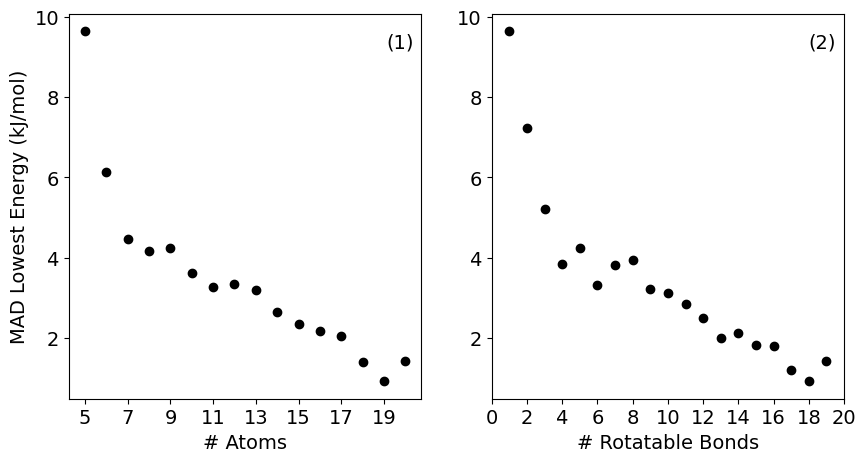

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey= False)


avg_eng_diff_list = []
num_rotatable_bonds_list = []
all_eng_diff_list = []
for tot_atoms in np.arange(2,21,1):
    eng_diff_list = []
    data_temp = data_all.loc[(data_all['# Atoms'] == tot_atoms)]
    SMILES = np.unique(data_temp['SMILES'].values)
    for smile in SMILES:
        rel_eng_list = list(data_temp.loc[(data_temp['SMILES'] == smile)]['Relative Energy [kJ/mol]'].values)
        rel_eng_list.sort()
        if len(rel_eng_list) == 1:
            continue 
        else:
            #compute eng difference
            eng_diff_list.append(np.abs(rel_eng_list[1]-rel_eng_list[0]))
            #compute number rotatable bonds
            mol = Chem.MolFromSmiles(smile)
            molh = Chem.AddHs(mol)
            rota_bond = Chem.rdMolDescriptors.CalcNumRotatableBonds(molh,strict = Chem.rdMolDescriptors.NumRotatableBondsOptions.StrictLinkages)
            num_rotatable_bonds_list.append(rota_bond)
            if rota_bond == 0:
                print(rota_bond, smile, rel_eng_list)
    avg_eng_diff_list.append(np.nanmean(eng_diff_list))
    all_eng_diff_list += eng_diff_list
    
#print(all_eng_diff_list,len(all_eng_diff_list))  
#print(num_rotatable_bonds_list,len(num_rotatable_bonds_list))

rotabonds_engdiff_list = list(zip(num_rotatable_bonds_list,all_eng_diff_list))


df_rotabonds = pd.DataFrame(rotabonds_engdiff_list, columns=['# Rotatable Bonds','Difference Lowest Energy'])
avg_eng_diff_rotabonds_list = []
for n in np.arange(np.min(df_rotabonds['# Rotatable Bonds'].values),np.max(df_rotabonds['# Rotatable Bonds'].values)+1,1):
    avg_rotabonds = np.mean(df_rotabonds.loc[df_rotabonds['# Rotatable Bonds'] == n]['Difference Lowest Energy'].values)
    avg_eng_diff_rotabonds_list.append(avg_rotabonds)


ax[0].plot(np.arange(2,21,1),avg_eng_diff_list,'ko')
ax[0].set_xlabel('# Atoms',fontsize=14)
ax[0].set_ylabel('MAD Lowest Energy (kJ/mol)',fontsize=14)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticks(np.arange(5,21,1))
ax[0].set_xticks([5,7,9,11,13,15,17,19])
ax[0].text(0.9, 0.95, '(1)', transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top')

ax[1].plot(np.arange(np.min(df_rotabonds['# Rotatable Bonds'].values),np.max(df_rotabonds['# Rotatable Bonds'].values)+1,1),avg_eng_diff_rotabonds_list,'ko')
ax[1].set_xlabel('# Rotatable Bonds',fontsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticks([0,2,4,6,8,10,12,14,16,18,20])
ax[1].text(0.9, 0.95, '(2)', transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top')
                            
plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/MAD_LowestEng.pdf',bbox_inches='tight')    

plt.show()

In [12]:
data_all.loc[data_all['SMILES']=='C(=O)(N)N=O']
mol = Chem.MolFromSmiles('C(=O)(N)N=O')
molh = Chem.AddHs(mol)
rota_bond = Chem.rdMolDescriptors.CalcNumRotatableBonds(molh,strict = Chem.rdMolDescriptors.NumRotatableBondsOptions.StrictLinkages)
print(rota_bond)

4


In [15]:
df_rotabonds

,# Rotatable Bonds,Difference Lowest Energy
0,1,9.640040
1,3,8.641563
2,2,7.176535
3,3,8.306549
4,4,5.010762
...,...,...
1777,18,0.226843
1778,19,0.214766
1779,19,0.764282
1780,19,2.257403


# Plot: # Conformers vs # Rotatable Bonds (Power-law relationship?)

In [18]:
unique_mols_list = []
for n in np.arange(0,20,1):
    unique_mols_list.append(len(np.unique(df_rota_smile.loc[df_rota_smile['# Rotatable Bonds'] == n]['SMILES'].values)))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 1.          1.05        1.05970149  1.16883117  1.26136364  1.46511628
  1.52488688  1.93886463  2.05241935  2.54198473  3.23220974  4.06694561
  4.88340807  5.55367232  7.16666667 11.25225225  9.0625     10.86538462
  9.          3.6       ]


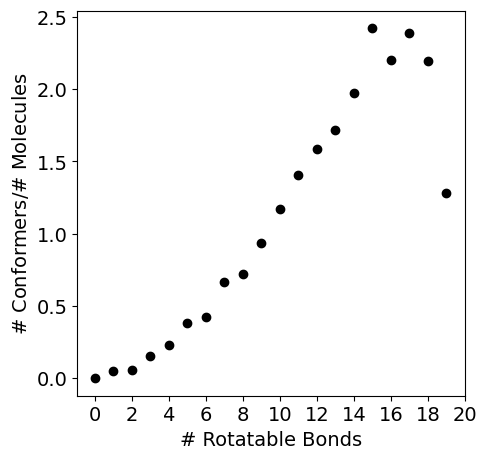

In [21]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

labels, counts = np.unique(rota_bond_list, return_counts=True)
print(labels,counts/unique_mols_list)
ax.plot(labels,counts/unique_mols_list,'ko')
ax.set_xlabel('# Rotatable Bonds',fontsize=14)
ax.set_ylabel(r'# Conformers$/$# Molecules',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])

In [20]:
df_rota_smile

,SMILES,# Rotatable Bonds
0,C#C,1
1,O=CC=O,3
2,C#CSO,3
3,O=CC=S,3
4,C1=CO1,2
...,...,...
10199,CC1=CC1C=C,10
10200,CC1=CC1C=C,10
10201,CC1=CC=CC1,9
10202,CC1=CC=CC1,9


# Plot: Conformer vs Rotamer Abundance